<a href="https://colab.research.google.com/github/nealtheseal108/imitation/blob/main/Copy_of_Basic_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # numpy math library
import pandas as pd # data manipulation and examination library
from matplotlib import pyplot as plt # matplotlib plotting library
from sklearn import linear_model # sci-kit-learn modeling library

# area to price conversion

In [4]:
df = pd.read_csv('homeprices.csv') # DataFrame is utilized to read the CSV file, file is converted to DF, which is essentially a possibly-heterogeneous 2D array with an expandable size

In [5]:
df # displays 'df' as a table

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
%matplotlib inline
# magic commands enable additional functionality in notebooks, and the 'matplotlib inline' magic command allows users to view graphs in the cell itself instead of in an external window

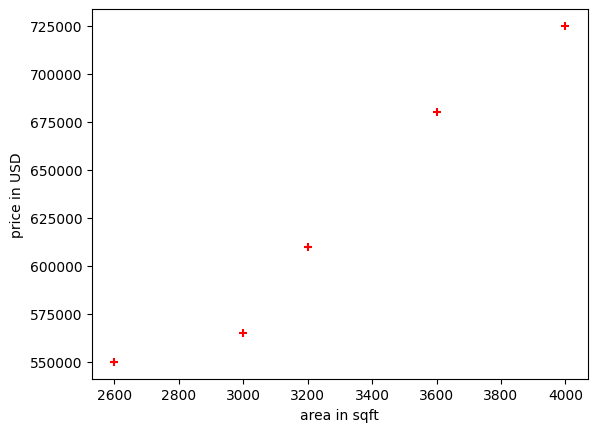

In [7]:
plt.xlabel('area in sqft') # labels x-axis
plt.ylabel('price in USD') # labels y-axis
plt.scatter(df.area,df.price,color='red',marker='x') # outlines variables displayed on both axes and stylizes the scatter plot

In [8]:
new_df = df.drop('price',axis='columns') # 'new_df' is set to 'df' but with the 'price' column eliminated
# new_df
area = df.area.to_frame() # transforms the 'area' column in 'df' to an entirely new DF, equivalent of df['area'].to_frame()
type(area) # returns the data type of 'area'

pandas.core.frame.DataFrame

In [9]:
price = df.price # saves 'price' as the price column of df as a 'Series' (essentially a List in java but with axis labeling)
print(type(price))
price

<class 'pandas.core.series.Series'>


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [10]:
reg = linear_model.LinearRegression() # sets 'reg' to a LinReg model and utilizes the .fit() command to analyze the feature values, or feature instances of the area and price of a home and ultimately determine the 'm' and 'b' paramters for the model
reg.fit(area,price)

LinearRegression()

In [12]:
reg.predict([[3300]]) # predicts the price of a 3.3k-square-foot house utilizing the paramters/knobs adjusted by the LinReg algorithm to create the LinReg model (does this based on the feature instances of the sample data); warning shows up because the DataFrame that was utilized to to train the model had labeled axes, but '3300' did not

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [13]:
reg.coef_ # the 'm' value in the model

array([135.78767123])

In [14]:
reg.intercept_ # the 'b' value in the model

180616.43835616432

### Y = m * X + b (m is coefficient and b is intercept)

In [15]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [16]:
# Predict price of a home with area = 5000 sqr ft
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
a = np.array([2000,2500,3000]) # 'a' is a NumPy array with values 200, 2500, and 3000

In [ ]:
a

array([2000, 2500, 3000])

In [ ]:
areas = pd.DataFrame(a,columns=['area']) # 'a' is casted as a pandas DF with axis label 'area'

In [ ]:
areas

,area
0,2000
1,2500
2,3000


In [ ]:
#predict for a whole set of houses
reg.predict(areas)

array([452191.78082192, 520085.61643836, 587979.45205479])

In [ ]:
p = reg.predict(areas) # sets p to the prices predicted in the previous line
areas['prices'] = p # creates new columns in the 'areas' DF called prices' which are the prices determined by the trained model
areas

,area,prices
0,2000,452191.780822
1,2500,520085.616438
2,3000,587979.452055


In [ ]:
areas.to_csv('output.csv') # outputs both areas and correspoding prices determined through inference in CSV

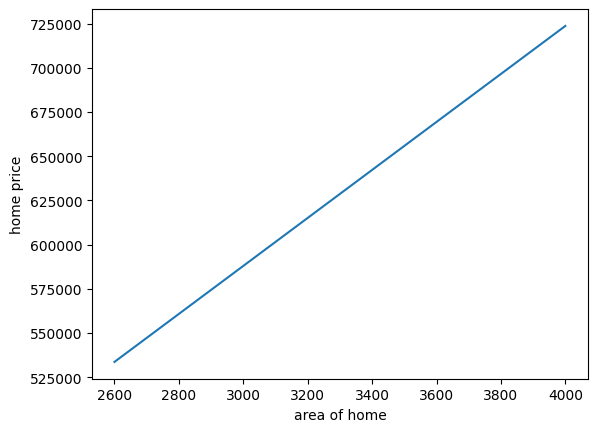

In [18]:
plt.xlabel('area of home') # labels x-axis
plt.ylabel('home price') # labels x-axis
plt.plot(df.area,reg.predict(df[['area']])) # plots the price inference linear equation determined by the LinReg model